In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/semantic-segmentation-of-aerial-imagery/Semantic segmentation dataset/classes.json
/kaggle/input/semantic-segmentation-of-aerial-imagery/Semantic segmentation dataset/Tile 7/images/image_part_002.jpg
/kaggle/input/semantic-segmentation-of-aerial-imagery/Semantic segmentation dataset/Tile 7/images/image_part_006.jpg
/kaggle/input/semantic-segmentation-of-aerial-imagery/Semantic segmentation dataset/Tile 7/images/image_part_005.jpg
/kaggle/input/semantic-segmentation-of-aerial-imagery/Semantic segmentation dataset/Tile 7/images/image_part_003.jpg
/kaggle/input/semantic-segmentation-of-aerial-imagery/Semantic segmentation dataset/Tile 7/images/image_part_004.jpg
/kaggle/input/semantic-segmentation-of-aerial-imagery/Semantic segmentation dataset/Tile 7/images/image_part_007.jpg
/kaggle/input/semantic-segmentation-of-aerial-imagery/Semantic segmentation dataset/Tile 7/images/image_part_009.jpg
/kaggle/input/semantic-segmentation-of-aerial-imagery/Semantic segmentation dataset/

In [2]:
!pip install patchify opencv-python tensorflow numpy scikit-learn --upgrade

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.1/62.1 kB 2.1 MB/s eta 0:00:00
INFO: pip is looking at multiple versions of opencv-python to determine which version is compatible with other requirements. This could take a while.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 644.9/644.9 MB 2.7 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.7/9.7 MB 101.7 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.7/4.7 MB 79.7 MB/s eta 0:00:00:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 81.6 MB/s eta 0:00:00:00:01
  Attempting uninstall: ml-dtypes
    Found existing installation: ml-dtypes 0.4.1
    Uninstalling ml-dtypes-0.4.1:
      Successfully uninstalled ml-dtypes-0.4.1
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.18.0
    Uninstalling tensorboard-2.18.0:
      Successfully uninstalled tensorboard-2.18.0
  Attempting uninstall: tensorflow
    Found existing installation: tensorflow 2.18.0


In [3]:
import numpy as np
import cv2
import os
import shutil
import matplotlib.pyplot as plt
from PIL import Image
from patchify import patchify
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split
import random

In [4]:
minmaxscaler = MinMaxScaler()

In [5]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/semantic-segmentation-of-aerial-imagery/Semantic segmentation dataset/classes.json
/kaggle/input/semantic-segmentation-of-aerial-imagery/Semantic segmentation dataset/Tile 7/images/image_part_002.jpg
/kaggle/input/semantic-segmentation-of-aerial-imagery/Semantic segmentation dataset/Tile 7/images/image_part_006.jpg
/kaggle/input/semantic-segmentation-of-aerial-imagery/Semantic segmentation dataset/Tile 7/images/image_part_005.jpg
/kaggle/input/semantic-segmentation-of-aerial-imagery/Semantic segmentation dataset/Tile 7/images/image_part_003.jpg
/kaggle/input/semantic-segmentation-of-aerial-imagery/Semantic segmentation dataset/Tile 7/images/image_part_004.jpg
/kaggle/input/semantic-segmentation-of-aerial-imagery/Semantic segmentation dataset/Tile 7/images/image_part_007.jpg
/kaggle/input/semantic-segmentation-of-aerial-imagery/Semantic segmentation dataset/Tile 7/images/image_part_009.jpg
/kaggle/input/semantic-segmentation-of-aerial-imagery/Semantic segmentation dataset/

In [6]:
for path, subdirs, files in os.walk('/kaggle/input'):
  dir_name = path.split(os.path.sep)[-1]
  print(dir_name)
  if dir_name == 'images':
    images = os.listdir(path)
    print(path)
    for i, image_name in enumerate(images):
      if(image_name.endswith('jpg')):
        print(image_name)
        a = True

input
semantic-segmentation-of-aerial-imagery
Semantic segmentation dataset
Tile 7
images
/kaggle/input/semantic-segmentation-of-aerial-imagery/Semantic segmentation dataset/Tile 7/images
image_part_002.jpg
image_part_006.jpg
image_part_005.jpg
image_part_003.jpg
image_part_004.jpg
image_part_007.jpg
image_part_009.jpg
image_part_008.jpg
image_part_001.jpg
masks
Tile 8
images
/kaggle/input/semantic-segmentation-of-aerial-imagery/Semantic segmentation dataset/Tile 8/images
image_part_002.jpg
image_part_006.jpg
image_part_005.jpg
image_part_003.jpg
image_part_004.jpg
image_part_007.jpg
image_part_009.jpg
image_part_008.jpg
image_part_001.jpg
masks
Tile 2
images
/kaggle/input/semantic-segmentation-of-aerial-imagery/Semantic segmentation dataset/Tile 2/images
image_part_002.jpg
image_part_006.jpg
image_part_005.jpg
image_part_003.jpg
image_part_004.jpg
image_part_007.jpg
image_part_009.jpg
image_part_008.jpg
image_part_001.jpg
masks
Tile 5
images
/kaggle/input/semantic-segmentation-of-aeri

In [7]:
image = cv2.imread('/kaggle/input/semantic-segmentation-of-aerial-imagery/Semantic segmentation dataset/Tile 1/images/image_part_001.jpg',1)

In [8]:
type(image)

numpy.ndarray

In [9]:
type(Image.fromarray(image))


PIL.Image.Image

In [10]:
image
image.shape

(644, 797, 3)

In [11]:
image_patch_size = 256

In [12]:
image_patches = patchify(image,(image_patch_size, image_patch_size,3),step = image_patch_size)

In [13]:
image_x = image_patches[0,0,:,:]
images_y = minmaxscaler.fit_transform(image_x.reshape(-1, image_x.shape[-1])).reshape(image_x.shape)

In [14]:
print(image_patches.shape)

(2, 3, 1, 256, 256, 3)


In [15]:
image_dataset = []
mask_dataset = []
for image_type in ['images' , 'masks']:
  if image_type == 'images':
    image_ex = 'jpg'
  elif image_type == 'masks':
     image_ex = 'png'
  for tile_id in range(1,9):
    for image_id in range(1,10):
      image = cv2.imread(f'/kaggle/input/semantic-segmentation-of-aerial-imagery/Semantic segmentation dataset/Tile {tile_id}/{image_type}/image_part_00{image_id}.{image_ex}',1)
      if image is not None:
        if image_type == 'masks':
          image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        #print(image.shape)
        size_x = (image.shape[1]//image_patch_size)*image_patch_size
        size_y = (image.shape[0]//image_patch_size)*image_patch_size
        #print("{} --- {} - {}".format(image.shape, size_x, size_y))
        image = Image.fromarray(image)
        image = image.crop((0,0, size_x, size_y))
        #print("({},  {})".format(image.size[0],image.size[1]))
        image = np.array(image)
        patched_images = patchify(image, (image_patch_size, image_patch_size, 3), step=image_patch_size)
        #print(len(patched_images))
        for i in range(patched_images.shape[0]):
          for j in range(patched_images.shape[1]):
            if image_type == 'images':
              individual_patched_image = patched_images[i,j,:,:]
              #print(individual_patched_image.shape)
              individual_patched_image = minmaxscaler.fit_transform(individual_patched_image.reshape(-1, individual_patched_image.shape[-1])).reshape(individual_patched_image.shape)
              individual_patched_image = individual_patched_image[0]
              #print(individual_patched_image.shape)
              image_dataset.append(individual_patched_image)
            elif image_type == 'masks':
              individual_patched_mask = patched_images[i,j,:,:]
              individual_patched_mask = individual_patched_mask[0]
              mask_dataset.append(individual_patched_mask)


In [16]:
print(len(image_dataset))
print(len(mask_dataset))

1305
1305


In [17]:
mask_dataset[0]

array([[[132,  41, 246],
        [132,  41, 246],
        [132,  41, 246],
        ...,
        [132,  41, 246],
        [132,  41, 246],
        [132,  41, 246]],

       [[132,  41, 246],
        [132,  41, 246],
        [132,  41, 246],
        ...,
        [132,  41, 246],
        [132,  41, 246],
        [132,  41, 246]],

       [[132,  41, 246],
        [132,  41, 246],
        [132,  41, 246],
        ...,
        [132,  41, 246],
        [132,  41, 246],
        [132,  41, 246]],

       ...,

       [[132,  41, 246],
        [132,  41, 246],
        [132,  41, 246],
        ...,
        [132,  41, 246],
        [132,  41, 246],
        [132,  41, 246]],

       [[132,  41, 246],
        [132,  41, 246],
        [132,  41, 246],
        ...,
        [132,  41, 246],
        [132,  41, 246],
        [132,  41, 246]],

       [[132,  41, 246],
        [132,  41, 246],
        [132,  41, 246],
        ...,
        [132,  41, 246],
        [132,  41, 246],
        [132,  41, 246]]

In [18]:
image_dataset = np.array(image_dataset)
mask_dataset = np.array(mask_dataset)

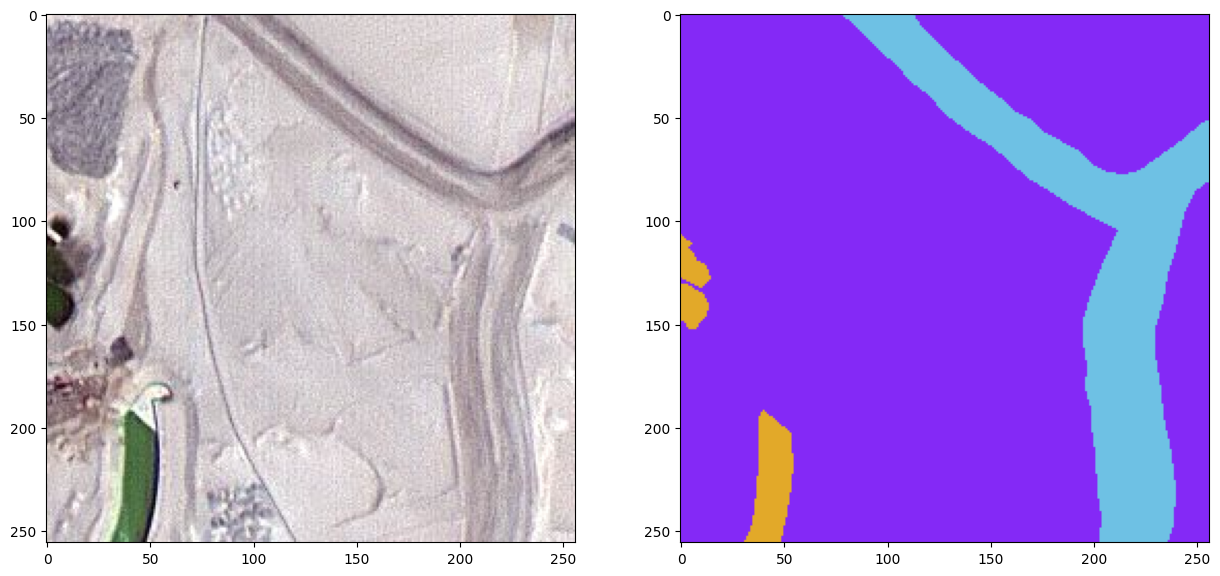

In [19]:
random_image_num = random.randint(0,len(image_dataset))

plt.figure(figsize = (15,10))
plt.subplot(121)
plt.imshow(image_dataset[random_image_num])
plt.subplot(122)
plt.imshow(mask_dataset[random_image_num])

In [20]:
class_building = '#3C1098'
class_building = class_building.lstrip("#")
class_building = np.array(tuple(int(class_building[i:i+2], 16) for i in (0,2,4)))
print(class_building)

class_land = '#8429F6'
class_land = class_land.lstrip("#")
class_land = np.array(tuple(int(class_land[i:i+2], 16) for i in (0,2,4)))
print(class_land)

class_vegetation = '#FEDD3A'
class_vegetation = class_vegetation.lstrip("#")
class_vegetation = np.array(tuple(int(class_vegetation[i:i+2], 16) for i in (0,2,4)))
print(class_vegetation)

class_road = '#6EC1E4'
class_road = class_road.lstrip("#")
class_road = np.array(tuple(int(class_road[i:i+2], 16) for i in (0,2,4)))
print(class_road)

class_water = '#E2A929'
class_water = class_water.lstrip("#")
class_water = np.array(tuple(int(class_water[i:i+2], 16) for i in (0,2,4)))
print(class_water)

class_unlabeled = '#9B9B9B'
class_unlabeled = class_unlabeled.lstrip("#")
class_unlabeled = np.array(tuple(int(class_unlabeled[i:i+2], 16) for i in (0,2,4)))
print(class_unlabeled)

[ 60  16 152]
[132  41 246]
[254 221  58]
[110 193 228]
[226 169  41]
[155 155 155]


In [21]:
mask_dataset.shape[0]

1305

In [22]:
label = individual_patched_mask

In [23]:
def rgb_to_label(label):
  label_segment = np.zeros(label.shape, dtype=np.uint8)
  label_segment[np.all(label == class_water, axis=-1)] = 0
  label_segment[np.all(label == class_land, axis=-1)] = 1
  label_segment[np.all(label == class_road, axis=-1)] = 2
  label_segment[np.all(label == class_building, axis=-1)] = 3
  label_segment[np.all(label == class_vegetation, axis=-1)] = 4
  label_segment[np.all(label == class_unlabeled, axis=-1)] = 5
  #print(label_segment)
  label_segment = label_segment[:,:,0]
  #print(label_segment)
  return label_segment

In [24]:
labels = []
for i in range(mask_dataset.shape[0]):
  label = rgb_to_label(mask_dataset[i])
  labels.append(label)


In [25]:
print(len(labels))

1305


In [26]:
labels = np.array(labels)

In [27]:
labels[0]

array([[1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       ...,
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1]], dtype=uint8)

In [28]:
labels = np.expand_dims(labels,axis=3)

In [29]:
labels[1][2]

array([[1],
       [1],
       [5],
       [5],
       [5],
       [5],
       [5],
       [5],
       [5],
       [5],
       [5],
       [5],
       [5],
       [5],
       [5],
       [5],
       [5],
       [5],
       [5],
       [5],
       [5],
       [5],
       [5],
       [5],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
    

In [30]:
np.unique(labels)

array([0, 1, 2, 3, 4, 5], dtype=uint8)

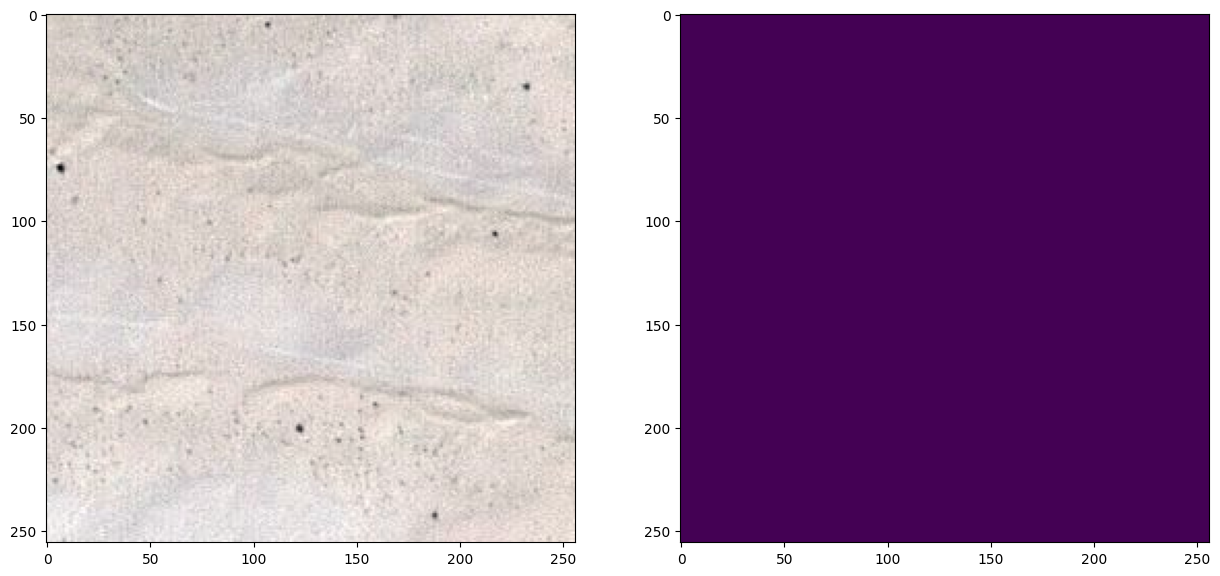

In [31]:
random_image_num = random.randint(0,len(image_dataset))

plt.figure(figsize = (15,10))
plt.subplot(121)
plt.imshow(image_dataset[random_image_num])
plt.subplot(122)
plt.imshow(labels[random_image_num][:,:,0])

In [32]:
training_set = image_dataset

In [33]:
import tensorflow as tf


2025-07-24 13:40:44.054036: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1753364444.071516      36 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1753364444.076578      36 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1753364444.090961      36 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1753364444.090975      36 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1753364444.090978      36 computation_placer.cc:177] computation placer alr

In [34]:
from tensorflow.keras.utils import to_categorical


In [35]:
labels_categorical_data = to_categorical(labels,num_classes = len(np.unique(labels)))

In [36]:
labels_categorical_data.shape

(1305, 256, 256, 6)

In [37]:
training_set.shape


(1305, 256, 256, 3)

In [38]:
from sklearn.model_selection import train_test_split

In [39]:
x_train, x_test, y_train, y_test = train_test_split(training_set,labels_categorical_data,test_size = 0.2,random_state = 100)

In [40]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(1044, 256, 256, 3)
(261, 256, 256, 3)
(1044, 256, 256, 6)
(261, 256, 256, 6)


In [41]:
image_height = x_train.shape[1]
image_width = x_train.shape[2]
image_channels = x_train.shape[3]
image_classes = y_train.shape[3]

In [42]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, UpSampling2D, Conv2DTranspose
from tensorflow.keras.layers import concatenate, BatchNormalization, Dropout, Lambda

In [43]:
from tensorflow.keras import backend as K

In [44]:
def jaccard_coef(y_true, y_pred):
  y_true_flatten = K.flatten(y_true)
  y_pred_flatten = K.flatten(y_pred)
  intersection = K.sum(y_true_flatten * y_pred_flatten)
  final_coef_value = (intersection + 1.0) / (K.sum(y_true_flatten) + K.sum(y_pred_flatten) - intersection + 1.0)
  return final_coef_value

In [45]:
def multi_unet_model(n_classes=5,
                     image_height=256,
                     image_width=256,
                     image_channels=1):

    # -------- Encoder --------
    inputs = Input(shape=(image_height, image_width, image_channels))

    c1 = Conv2D(16,  (3, 3), activation="relu", kernel_initializer="he_normal", padding="same")(inputs)
    c1 = Dropout(0.2)(c1)
    c1 = Conv2D(16,  (3, 3), activation="relu", kernel_initializer="he_normal", padding="same")(c1)
    p1 = MaxPooling2D((2, 2))(c1)

    c2 = Conv2D(32,  (3, 3), activation="relu", kernel_initializer="he_normal", padding="same")(p1)
    c2 = Dropout(0.2)(c2)
    c2 = Conv2D(32,  (3, 3), activation="relu", kernel_initializer="he_normal", padding="same")(c2)
    p2 = MaxPooling2D((2, 2))(c2)

    c3 = Conv2D(64,  (3, 3), activation="relu", kernel_initializer="he_normal", padding="same")(p2)
    c3 = Dropout(0.2)(c3)
    c3 = Conv2D(64,  (3, 3), activation="relu", kernel_initializer="he_normal", padding="same")(c3)
    p3 = MaxPooling2D((2, 2))(c3)

    c4 = Conv2D(128, (3, 3), activation="relu", kernel_initializer="he_normal", padding="same")(p3)
    c4 = Dropout(0.2)(c4)
    c4 = Conv2D(128, (3, 3), activation="relu", kernel_initializer="he_normal", padding="same")(c4)
    p4 = MaxPooling2D((2, 2))(c4)

    c5 = Conv2D(256, (3, 3), activation="relu", kernel_initializer="he_normal", padding="same")(p4)
    c5 = Dropout(0.2)(c5)
    c5 = Conv2D(256, (3, 3), activation="relu", kernel_initializer="he_normal", padding="same")(c5)

    # -------- Decoder --------
    u6 = Conv2DTranspose(128, (3, 3), strides=(2, 2), padding="same")(c5)
    u6 = concatenate([u6, c4])
    c6 = Conv2D(128, (3, 3), activation="relu", kernel_initializer="he_normal", padding="same")(u6)
    c6 = Dropout(0.2)(c6)
    c6 = Conv2D(128, (3, 3), activation="relu", kernel_initializer="he_normal", padding="same")(c6)

    u7 = Conv2DTranspose(64, (3, 3), strides=(2, 2), padding="same")(c6)
    u7 = concatenate([u7, c3])
    c7 = Conv2D(64, (3, 3), activation="relu", kernel_initializer="he_normal", padding="same")(u7)
    c7 = Dropout(0.2)(c7)
    c7 = Conv2D(64, (3, 3), activation="relu", kernel_initializer="he_normal", padding="same")(c7)

    u8 = Conv2DTranspose(32, (3, 3), strides=(2, 2), padding="same")(c7)
    u8 = concatenate([u8, c2])
    c8 = Conv2D(32, (3, 3), activation="relu", kernel_initializer="he_normal", padding="same")(u8)
    c8 = Dropout(0.2)(c8)
    c8 = Conv2D(32, (3, 3), activation="relu", kernel_initializer="he_normal", padding="same")(c8)

    u9 = Conv2DTranspose(16, (3, 3), strides=(2, 2), padding="same")(c8)
    u9 = concatenate([u9, c1], axis=3)
    c9 = Conv2D(16, (3, 3), activation="relu", kernel_initializer="he_normal", padding="same")(u9)
    c9 = Dropout(0.2)(c9)
    c9 = Conv2D(16, (3, 3), activation="relu", kernel_initializer="he_normal", padding="same")(c9)

    outputs = Conv2D(n_classes, (1, 1), activation="softmax")(c9)

    model = Model(inputs=inputs, outputs=outputs)
    return model


In [46]:
metrics = ['accuracy', jaccard_coef]

In [47]:
def get_model():
  return multi_unet_model(n_classes=image_classes ,
                          image_height=image_height,
                          image_width=image_width,
                          image_channels=image_channels)


In [48]:
model = get_model()

I0000 00:00:1753364460.861602      36 gpu_device.cc:2019] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 13942 MB memory:  -> device: 0, name: Tesla T4, pci bus id: 0000:00:04.0, compute capability: 7.5
I0000 00:00:1753364460.865446      36 gpu_device.cc:2019] Created device /job:localhost/replica:0/task:0/device:GPU:1 with 13942 MB memory:  -> device: 1, name: Tesla T4, pci bus id: 0000:00:05.0, compute capability: 7.5


In [49]:
model.get_config()

{'name': 'functional',
 'trainable': True,
 'layers': [{'module': 'keras.layers',
   'class_name': 'InputLayer',
   'config': {'batch_shape': (None, 256, 256, 3),
    'dtype': 'float32',
    'sparse': False,
    'name': 'input_layer'},
   'registered_name': None,
   'name': 'input_layer',
   'inbound_nodes': []},
  {'module': 'keras.layers',
   'class_name': 'Conv2D',
   'config': {'name': 'conv2d',
    'trainable': True,
    'dtype': {'module': 'keras',
     'class_name': 'DTypePolicy',
     'config': {'name': 'float32'},
     'registered_name': None},
    'filters': 16,
    'kernel_size': (3, 3),
    'strides': (1, 1),
    'padding': 'same',
    'data_format': 'channels_last',
    'dilation_rate': (1, 1),
    'groups': 1,
    'activation': 'relu',
    'use_bias': True,
    'kernel_initializer': {'module': 'keras.initializers',
     'class_name': 'HeNormal',
     'config': {'seed': None},
     'registered_name': None},
    'bias_initializer': {'module': 'keras.initializers',
     'cla

In [50]:
weights = [0.166,0.166,0.166,0.166,0.166,0.166]


In [51]:
!pip uninstall tensorflow -y

Found existing installation: tensorflow 2.19.0
Uninstalling tensorflow-2.19.0:
  Successfully uninstalled tensorflow-2.19.0


In [52]:
!pip install tensorflow==2.15.0

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 475.3/475.3 MB 3.7 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 3.8 MB/s eta 0:00:000:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 38.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 105.1 MB/s eta 0:00:0000:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 442.0/442.0 kB 21.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.4/78.4 kB 4.9 MB/s eta 0:00:00
  Attempting uninstall: wrapt
    Found existing installation: wrapt 1.17.2
    Uninstalling wrapt-1.17.2:
      Successfully uninstalled wrapt-1.17.2
  Attempting uninstall: keras
    Found existing installation: keras 3.8.0
    Uninstalling keras-3.8.0:
      Successfully uninstalled keras-3.8.0
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.19.0
    Uninstalling tensorboard-2.19.0:
      Successfully uninstalled tensorboard-2.19.0
  Attempting uninstall: ml-dtypes

In [53]:
!pip install segmentation-models

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.7/50.7 kB 2.2 MB/s eta 0:00:00


In [54]:
import os
os.environ['SM_FRAMEWORK'] = 'tf.keras'  # Set environment variable for segmentation_models
import segmentation_models as sm

# Verify framework
print(sm.__version__)


Segmentation Models: using `tf.keras` framework.
1.0.1


In [55]:
dice_loss = sm.losses.DiceLoss(class_weights = weights)

In [56]:
focal_loss  = sm.losses.CategoricalFocalLoss()

In [57]:
total_loss = dice_loss + (1*focal_loss)

In [58]:
tf.keras.backend.clear_session()


In [59]:
model.compile(optimizer ='adam',
              loss = total_loss,
             metrics = metrics)

In [60]:
model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 256, 256,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d (Conv2D)     │ (None, 256, 256,  │        448 │ input_layer[0][0] │
│                     │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout (Dropout)   │ (None, 256, 256,  │          0 │ conv2d[0][0]      │
│                     │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_1 (Conv2D)   │ (None, 256, 256,  │      2,320 │ dropout[0][0]     │
│                     │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d       │ (None, 128, 128,  │          0 │ conv2d_1[0][0]    │
│ (MaxPooling2D)      │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_2 (Conv2D)   │ (None, 128, 128,  │      4,640 │ max_pooling2d[0]… │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_1 (Dropout) │ (None, 128, 128,  │          0 │ conv2d_2[0][0]    │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_3 (Conv2D)   │ (None, 128, 128,  │      9,248 │ dropout_1[0][0]   │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_1     │ (None, 64, 64,    │          0 │ conv2d_3[0][0]    │
│ (MaxPooling2D)      │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_4 (Conv2D)   │ (None, 64, 64,    │     18,496 │ max_pooling2d_1[… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_2 (Dropout) │ (None, 64, 64,    │          0 │ conv2d_4[0][0]    │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_5 (Conv2D)   │ (None, 64, 64,    │     36,928 │ dropout_2[0][0]   │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_2     │ (None, 32, 32,    │          0 │ conv2d_5[0][0]    │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_6 (Conv2D)   │ (None, 32, 32,    │     73,856 │ max_pooling2d_2[… │
│                     │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_3 (Dropout) │ (None, 32, 32,    │          0 │ conv2d_6[0][0]    │
│                     │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_7 (Conv2D)   │ (None, 32, 32,    │    147,584 │ dropout_3[0][0]   │
│                     │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_3     │ (None, 16, 16,    │          0 │ conv2d_7[0][0]  

 Total params: 2,158,790 (8.24 MB)

 Trainable params: 2,158,790 (8.24 MB)

 Non-trainable params: 0 (0.00 B)

In [61]:
from tensorflow.keras.utils import plot_model


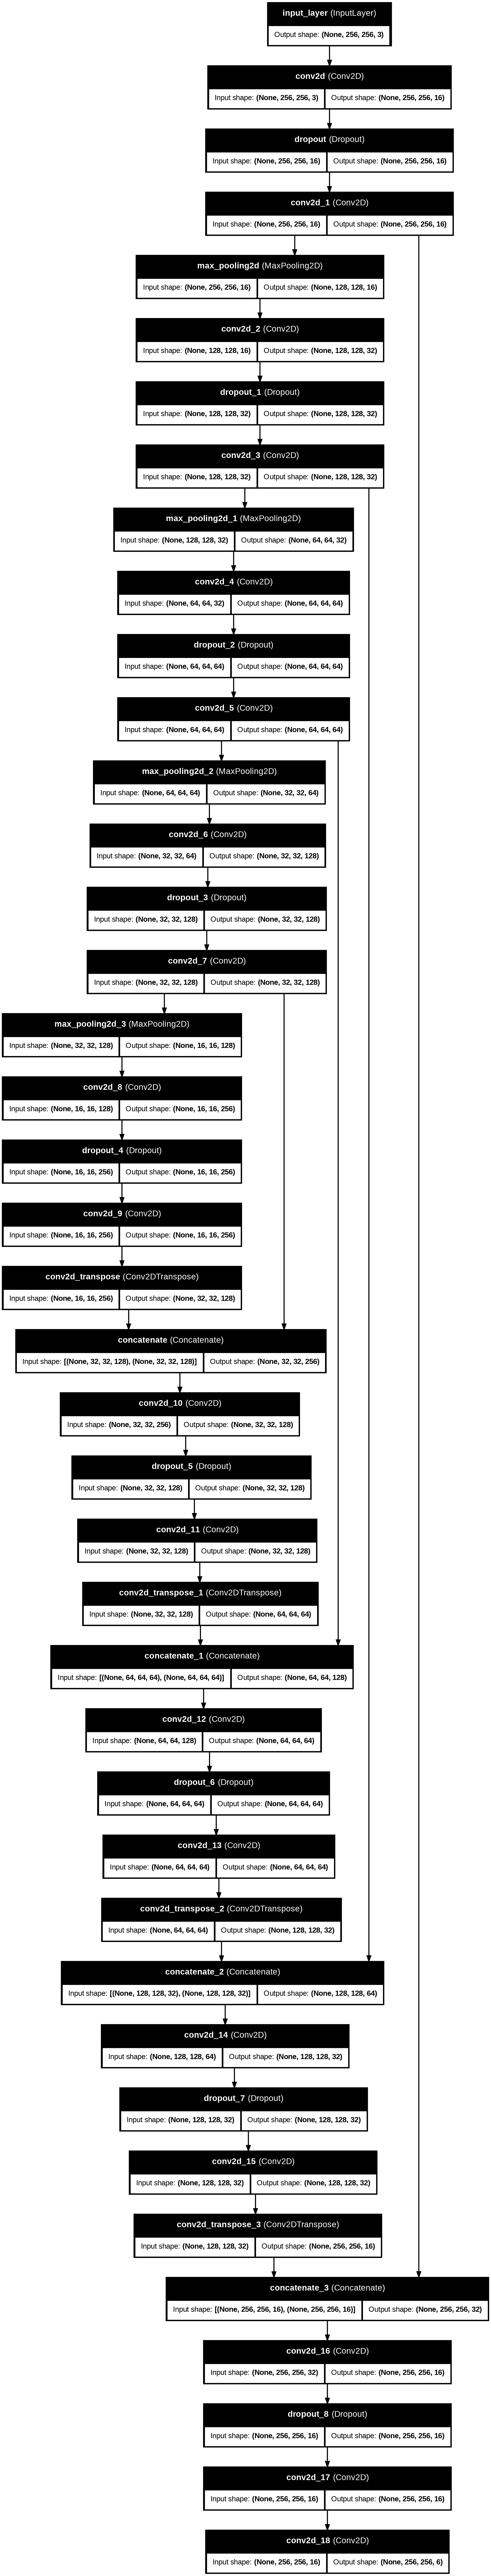

In [62]:
plot_model(model,to_file = "satellite_segmentation_model.png", show_shapes = True, show_layer_names = True)

In [63]:
model_history = model.fit(x_train,y_train,
                         batch_size=16,
                         verbose = 1,
                         epochs = 100,
                         validation_data=(x_test,y_test),
                         shuffle = False)

Epoch 1/100


I0000 00:00:1753364528.143762     116 service.cc:152] XLA service 0x7f37058a96e0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1753364528.143804     116 service.cc:160]   StreamExecutor device (0): Tesla T4, Compute Capability 7.5
I0000 00:00:1753364528.143808     116 service.cc:160]   StreamExecutor device (1): Tesla T4, Compute Capability 7.5
I0000 00:00:1753364529.474413     116 cuda_dnn.cc:529] Loaded cuDNN version 90300
I0000 00:00:1753364549.405938     116 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


66/66 ━━━━━━━━━━━━━━━━━━━━ 65s 523ms/step - accuracy: 0.5065 - jaccard_coef: 0.2326 - loss: 1.0032 - val_accuracy: 0.6462 - val_jaccard_coef: 0.3542 - val_loss: 0.9861
Epoch 2/100
66/66 ━━━━━━━━━━━━━━━━━━━━ 10s 157ms/step - accuracy: 0.6517 - jaccard_coef: 0.3770 - loss: 0.9728 - val_accuracy: 0.7076 - val_jaccard_coef: 0.4554 - val_loss: 0.9631
Epoch 3/100
66/66 ━━━━━━━━━━━━━━━━━━━━ 11s 159ms/step - accuracy: 0.7009 - jaccard_coef: 0.4401 - loss: 0.9596 - val_accuracy: 0.7027 - val_jaccard_coef: 0.4762 - val_loss: 0.9576
Epoch 4/100
66/66 ━━━━━━━━━━━━━━━━━━━━ 11s 162ms/step - accuracy: 0.7308 - jaccard_coef: 0.4909 - loss: 0.9512 - val_accuracy: 0.6930 - val_jaccard_coef: 0.4768 - val_loss: 0.9602
Epoch 5/100
66/66 ━━━━━━━━━━━━━━━━━━━━ 11s 163ms/step - accuracy: 0.7469 - jaccard_coef: 0.5235 - loss: 0.9443 - val_accuracy: 0.7543 - val_jaccard_coef: 0.5483 - val_loss: 0.9461
Epoch 6/100
66/66 ━━━━━━━━━━━━━━━━━━━━ 11s 165ms/step - accuracy: 0.7732 - jaccard_coef: 0.5630 - loss: 0.9369 -

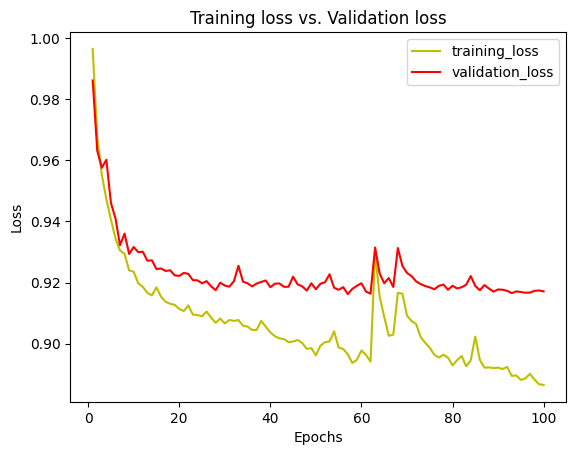

In [64]:
loss = model_history.history['loss']
val_loss = model_history.history['val_loss']
epochs = range(1,len(loss)+1 )
plt.plot(epochs,loss,'y', label = 'training_loss')
plt.plot(epochs,val_loss,'r', label = 'validation_loss') 
plt.title('Training loss vs. Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

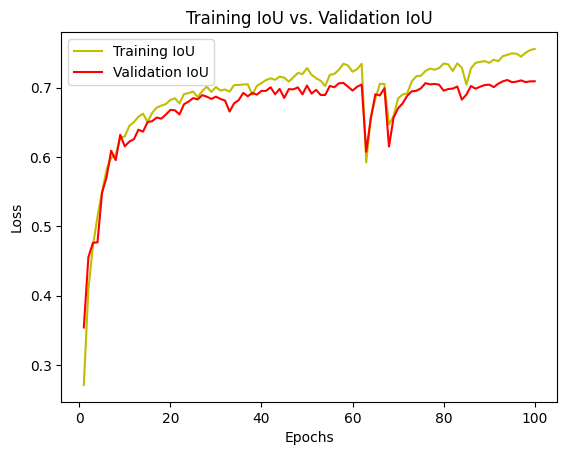

In [65]:
jaccard_coef = model_history.history['jaccard_coef']
val_jaccard_coef = model_history.history['val_jaccard_coef']
epochs = range(1,len(jaccard_coef )+1 )
plt.plot(epochs,jaccard_coef,'y', label = 'Training IoU')
plt.plot(epochs,val_jaccard_coef,'r', label = 'Validation IoU') 
plt.title('Training IoU vs. Validation IoU')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [66]:
y_pred = model.predict(x_test)

9/9 ━━━━━━━━━━━━━━━━━━━━ 10s 203ms/step


In [67]:
y_pred

array([[[[6.01386977e-03, 8.95751297e-01, 5.39324842e-02,
          3.61778140e-02, 7.87382107e-03, 2.50673271e-04],
         [2.12323968e-03, 9.47683036e-01, 2.59259604e-02,
          2.13856343e-02, 2.83436687e-03, 4.77862413e-05],
         [2.70575937e-03, 9.51758623e-01, 2.68298946e-02,
          1.50857801e-02, 3.57215246e-03, 4.78487527e-05],
         ...,
         [2.34272191e-03, 9.71382380e-01, 2.08607633e-02,
          4.50110715e-03, 8.62733985e-04, 5.03597730e-05],
         [2.14162865e-03, 9.74157214e-01, 1.78117175e-02,
          4.81484970e-03, 1.03898149e-03, 3.56373821e-05],
         [1.41124297e-02, 8.98483753e-01, 5.77516183e-02,
          2.16562245e-02, 7.39422580e-03, 6.01887994e-04]],

        [[7.48001388e-04, 9.62370038e-01, 2.39070952e-02,
          1.18318293e-02, 1.12068246e-03, 2.23337611e-05],
         [1.94680004e-04, 9.83065546e-01, 1.10126892e-02,
          5.51473163e-03, 2.09276273e-04, 3.05490516e-06],
         [3.09387513e-04, 9.85717177e-01, 9.7490

In [68]:
y_pred_argmax = np.argmax(y_pred,axis=3)

In [69]:
y_pred_argmax

array([[[1, 1, 1, ..., 1, 1, 1],
        [1, 1, 1, ..., 1, 1, 1],
        [1, 1, 1, ..., 1, 1, 1],
        ...,
        [1, 1, 1, ..., 3, 3, 3],
        [1, 1, 1, ..., 3, 3, 3],
        [1, 1, 1, ..., 3, 3, 3]],

       [[1, 1, 1, ..., 3, 3, 3],
        [1, 1, 1, ..., 3, 3, 3],
        [1, 1, 1, ..., 3, 3, 3],
        ...,
        [4, 4, 1, ..., 1, 1, 1],
        [1, 1, 1, ..., 1, 1, 1],
        [4, 4, 1, ..., 1, 1, 1]],

       [[1, 2, 2, ..., 1, 1, 1],
        [2, 2, 2, ..., 1, 1, 1],
        [2, 2, 2, ..., 1, 1, 1],
        ...,
        [2, 2, 2, ..., 1, 1, 1],
        [2, 2, 2, ..., 1, 1, 1],
        [2, 2, 2, ..., 1, 1, 1]],

       ...,

       [[1, 1, 1, ..., 1, 1, 1],
        [1, 1, 1, ..., 1, 1, 1],
        [1, 1, 1, ..., 1, 1, 1],
        ...,
        [1, 1, 1, ..., 1, 1, 1],
        [1, 1, 1, ..., 1, 1, 1],
        [1, 1, 1, ..., 1, 1, 1]],

       [[1, 1, 1, ..., 0, 0, 0],
        [1, 1, 1, ..., 0, 0, 0],
        [4, 4, 1, ..., 0, 0, 0],
        ...,
        [1, 1, 1, ..., 

In [70]:
len(y_pred_argmax)

261

In [71]:
y_test_argmax = np.argmax(y_test,axis=3)

In [72]:
y_test_argmax

array([[[1, 1, 3, ..., 1, 1, 1],
        [1, 1, 3, ..., 1, 1, 1],
        [1, 1, 3, ..., 1, 1, 1],
        ...,
        [1, 1, 1, ..., 1, 1, 1],
        [1, 1, 1, ..., 1, 1, 1],
        [1, 1, 1, ..., 1, 1, 1]],

       [[1, 1, 1, ..., 1, 1, 1],
        [1, 1, 1, ..., 1, 1, 1],
        [1, 1, 1, ..., 1, 1, 1],
        ...,
        [3, 3, 3, ..., 1, 1, 1],
        [3, 3, 3, ..., 1, 1, 1],
        [3, 3, 3, ..., 1, 1, 1]],

       [[1, 2, 2, ..., 1, 1, 1],
        [1, 2, 2, ..., 1, 1, 2],
        [1, 2, 2, ..., 1, 2, 2],
        ...,
        [2, 2, 2, ..., 1, 1, 1],
        [2, 2, 2, ..., 1, 1, 1],
        [2, 2, 2, ..., 1, 1, 1]],

       ...,

       [[1, 1, 1, ..., 1, 1, 1],
        [1, 1, 1, ..., 1, 1, 1],
        [1, 1, 1, ..., 1, 1, 1],
        ...,
        [2, 2, 2, ..., 1, 1, 1],
        [2, 2, 2, ..., 1, 1, 1],
        [2, 2, 2, ..., 1, 1, 1]],

       [[3, 3, 3, ..., 0, 0, 0],
        [3, 3, 3, ..., 0, 0, 0],
        [3, 3, 3, ..., 0, 0, 0],
        ...,
        [4, 4, 4, ..., 

In [73]:
test_img_num = random.randint(0, 10)  

test_img = x_test[test_img_num]
ground_truth_image = y_test_argmax[test_img_num]
 
test_image_input = np.expand_dims(test_img,0)

prediction = model.predict(test_image_input)
predicted_image = np.argmax(prediction,axis=3)


1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


In [74]:
predicted_image

array([[[1, 0, 0, ..., 4, 4, 4],
        [0, 0, 0, ..., 4, 4, 4],
        [0, 0, 0, ..., 4, 4, 4],
        ...,
        [1, 1, 1, ..., 4, 4, 4],
        [1, 1, 1, ..., 4, 4, 4],
        [1, 1, 1, ..., 4, 4, 4]]])

In [75]:
predicted_image = predicted_image[0,:,:]
predicted_image

array([[1, 0, 0, ..., 4, 4, 4],
       [0, 0, 0, ..., 4, 4, 4],
       [0, 0, 0, ..., 4, 4, 4],
       ...,
       [1, 1, 1, ..., 4, 4, 4],
       [1, 1, 1, ..., 4, 4, 4],
       [1, 1, 1, ..., 4, 4, 4]])

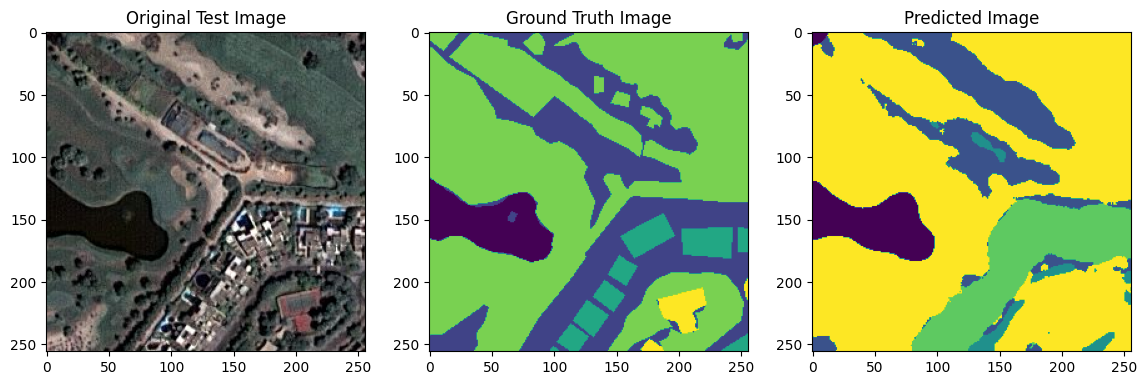

In [76]:
plt.figure(figsize =(14,8))
plt.subplot(131)
plt.title('Original Test Image')
plt.imshow(test_img)

plt.subplot(132)
plt.title('Ground Truth Image')
plt.imshow(ground_truth_image)

plt.subplot(133)
plt.title('Predicted Image')
plt.imshow(predicted_image)



In [77]:
model.save('satellite_seg_model.h5')